In [1]:
from pprint import pprint
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd

data_path = "./resources/winequality-red.csv"
# %matplotlib inline
# %config InlineBackend.figure_format='svg'

In [2]:
def plot_scatter_matrix(wine_data, good_treshold, bad_trashold, save_plot=False):
    count_of_props = len(wine_data[0]) - 1
    fig, axes = plt.subplots(count_of_props, count_of_props, figsize=(15, 10))
    fig.subplots_adjust(hspace=0, wspace=0)
    prop_names = wine_data[0][:-1]
    i = 0
    for ax in axes:
        ax[i].text(0.5, 0.5, prop_names[i].replace(' ', '\n'), ha='center', va='center')
        for a in ax:
            a.set_xticklabels([])
            a.set_yticklabels([])
            a.tick_params(axis='both', width=0)
        i += 1
    columns = []
    for column in range(len(wine_data[0])):
        columns.append([el[column] for el in wine_data])
    columns2 = []
    for column in columns:
        columns2.append([float(el) for el in column[1:]])
    columns = columns2
    column_height = len(columns[0])
    for i in range(count_of_props):
        for j in range(count_of_props):
            if i == j:
                continue
            good_x = []
            good_y = []
            bad_x = []
            bad_y = []
            for k in range(column_height):
                if columns[-1][k] > good_treshold:
                    good_x.append(columns[j][k])
                    good_y.append(columns[i][k])
                if columns[-1][k] < bad_trashold:
                    bad_x.append(columns[j][k])
                    bad_y.append(columns[i][k])
            dots1 = axes[i][j].plot(good_x, good_y, 'go')
            dots1[0].set_markersize(0.5)
            dots2 = axes[i][j].plot(bad_x, bad_y, 'ro')
            dots2[0].set_markersize(0.5)
    if save_plot:
        plt.savefig("./scatter_plot.png")
    plt.show(fig)

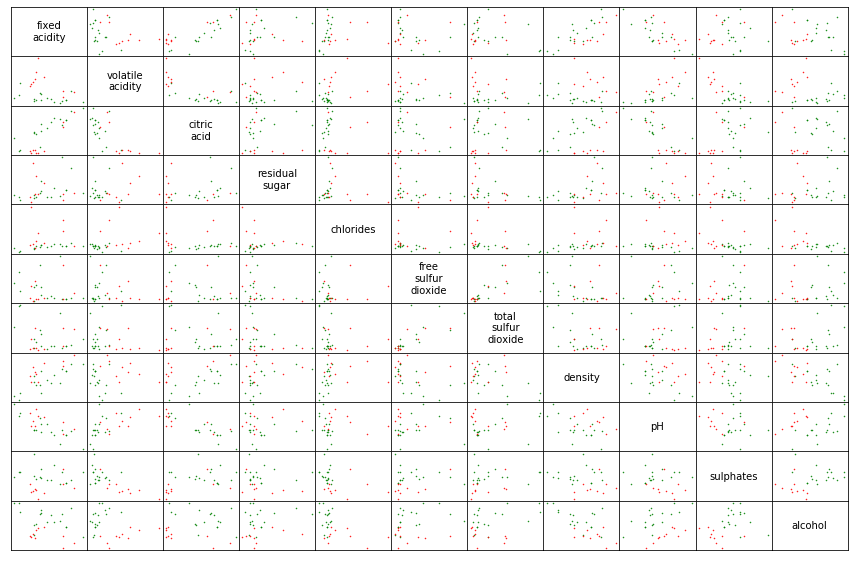

In [3]:
reader = csv.reader(open(data_path, mode='r'), delimiter=";")
data = [el for el in reader]
plot_scatter_matrix(data, 7, 4)

I prefer to take density and citric acid for perceptron training

# V.2 Learning to perceptron

In [4]:
def ft_dot(a, b):
    if len(a) != len(b):
        raise ValueError
    return sum([ai * bi for ai, bi in zip(a, b)])


class Perceptron():

    def __init__(self, lr=0.0001):
        self.lr = lr
        self.performance = []
        self.W = []
        self.bias = None

    def _heaviside(self, arg):
        return 1 if arg >= 0 else 0
    
    def _train_epoch(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(self.W, xi) + self.bias
            if self._heaviside(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._heaviside(res))
                Wnew = []
                for w, xi_j in zip(self.W, xi):
                    wnew = w + self.lr * (yi - self._heaviside(res)) * xi_j
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

    def train(self, X, y, epoches=0):
        self.W = [random.uniform(-1, 1) for i in range(X.shape[1])]                                                       
        self.bias = random.uniform(-1, 1)
        epoch_num = 0
        while True:
            epoch_erro_num = self._train_epoch(X, y)
            epoch_num += 1
            self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
            if epoches == epoch_num:
                break
            if epoch_erro_num == 0:
                break
        return self.performance

In [5]:
df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)

In [6]:
X = selected_data[['density', 'citric acid']]
y = selected_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X, y)
for el in performance:
    print('epoch num -  {} errors - {}'.format(el[0], el[1]))

epoch num -  1 errors - 18
epoch num -  2 errors - 18
epoch num -  3 errors - 18
epoch num -  4 errors - 16
epoch num -  5 errors - 11
epoch num -  6 errors - 8
epoch num -  7 errors - 7
epoch num -  8 errors - 7
epoch num -  9 errors - 7
epoch num -  10 errors - 7
epoch num -  11 errors - 7
epoch num -  12 errors - 7
epoch num -  13 errors - 6
epoch num -  14 errors - 6
epoch num -  15 errors - 6
epoch num -  16 errors - 6
epoch num -  17 errors - 7
epoch num -  18 errors - 6
epoch num -  19 errors - 6
epoch num -  20 errors - 6
epoch num -  21 errors - 6
epoch num -  22 errors - 7
epoch num -  23 errors - 6
epoch num -  24 errors - 6
epoch num -  25 errors - 6
epoch num -  26 errors - 6
epoch num -  27 errors - 6
epoch num -  28 errors - 7
epoch num -  29 errors - 6
epoch num -  30 errors - 6
epoch num -  31 errors - 6
epoch num -  32 errors - 6
epoch num -  33 errors - 6
epoch num -  34 errors - 7
epoch num -  35 errors - 6
epoch num -  36 errors - 6
epoch num -  37 errors - 6
epoch

epoch num -  3004 errors - 11
epoch num -  3005 errors - 10
epoch num -  3006 errors - 10
epoch num -  3007 errors - 12
epoch num -  3008 errors - 10
epoch num -  3009 errors - 12
epoch num -  3010 errors - 10
epoch num -  3011 errors - 10
epoch num -  3012 errors - 12
epoch num -  3013 errors - 10
epoch num -  3014 errors - 10
epoch num -  3015 errors - 12
epoch num -  3016 errors - 10
epoch num -  3017 errors - 10
epoch num -  3018 errors - 12
epoch num -  3019 errors - 10
epoch num -  3020 errors - 10
epoch num -  3021 errors - 12
epoch num -  3022 errors - 10
epoch num -  3023 errors - 10
epoch num -  3024 errors - 12
epoch num -  3025 errors - 10
epoch num -  3026 errors - 12
epoch num -  3027 errors - 10
epoch num -  3028 errors - 10
epoch num -  3029 errors - 12
epoch num -  3030 errors - 10
epoch num -  3031 errors - 10
epoch num -  3032 errors - 12
epoch num -  3033 errors - 10
epoch num -  3034 errors - 10
epoch num -  3035 errors - 12
epoch num -  3036 errors - 10
epoch num 

epoch num -  5456 errors - 10
epoch num -  5457 errors - 10
epoch num -  5458 errors - 12
epoch num -  5459 errors - 10
epoch num -  5460 errors - 12
epoch num -  5461 errors - 10
epoch num -  5462 errors - 10
epoch num -  5463 errors - 12
epoch num -  5464 errors - 10
epoch num -  5465 errors - 10
epoch num -  5466 errors - 12
epoch num -  5467 errors - 10
epoch num -  5468 errors - 10
epoch num -  5469 errors - 12
epoch num -  5470 errors - 10
epoch num -  5471 errors - 10
epoch num -  5472 errors - 12
epoch num -  5473 errors - 10
epoch num -  5474 errors - 10
epoch num -  5475 errors - 12
epoch num -  5476 errors - 10
epoch num -  5477 errors - 12
epoch num -  5478 errors - 10
epoch num -  5479 errors - 10
epoch num -  5480 errors - 12
epoch num -  5481 errors - 10
epoch num -  5482 errors - 10
epoch num -  5483 errors - 12
epoch num -  5484 errors - 10
epoch num -  5485 errors - 10
epoch num -  5486 errors - 12
epoch num -  5487 errors - 10
epoch num -  5488 errors - 10
epoch num 

epoch num -  8455 errors - 10
epoch num -  8456 errors - 10
epoch num -  8457 errors - 10
epoch num -  8458 errors - 10
epoch num -  8459 errors - 8
epoch num -  8460 errors - 8
epoch num -  8461 errors - 8
epoch num -  8462 errors - 11
epoch num -  8463 errors - 11
epoch num -  8464 errors - 11
epoch num -  8465 errors - 12
epoch num -  8466 errors - 10
epoch num -  8467 errors - 11
epoch num -  8468 errors - 11
epoch num -  8469 errors - 12
epoch num -  8470 errors - 10
epoch num -  8471 errors - 10
epoch num -  8472 errors - 12
epoch num -  8473 errors - 10
epoch num -  8474 errors - 10
epoch num -  8475 errors - 10
epoch num -  8476 errors - 10
epoch num -  8477 errors - 12
epoch num -  8478 errors - 10
epoch num -  8479 errors - 10
epoch num -  8480 errors - 12
epoch num -  8481 errors - 10
epoch num -  8482 errors - 10
epoch num -  8483 errors - 12
epoch num -  8484 errors - 10
epoch num -  8485 errors - 10
epoch num -  8486 errors - 10
epoch num -  8487 errors - 10
epoch num -  

epoch num -  11103 errors - 10
epoch num -  11104 errors - 10
epoch num -  11105 errors - 10
epoch num -  11106 errors - 10
epoch num -  11107 errors - 10
epoch num -  11108 errors - 10
epoch num -  11109 errors - 10
epoch num -  11110 errors - 10
epoch num -  11111 errors - 10
epoch num -  11112 errors - 10
epoch num -  11113 errors - 10
epoch num -  11114 errors - 10
epoch num -  11115 errors - 10
epoch num -  11116 errors - 10
epoch num -  11117 errors - 10
epoch num -  11118 errors - 10
epoch num -  11119 errors - 10
epoch num -  11120 errors - 10
epoch num -  11121 errors - 10
epoch num -  11122 errors - 10
epoch num -  11123 errors - 10
epoch num -  11124 errors - 10
epoch num -  11125 errors - 10
epoch num -  11126 errors - 10
epoch num -  11127 errors - 10
epoch num -  11128 errors - 10
epoch num -  11129 errors - 10
epoch num -  11130 errors - 10
epoch num -  11131 errors - 10
epoch num -  11132 errors - 10
epoch num -  11133 errors - 10
epoch num -  11134 errors - 10
epoch nu

epoch num -  13815 errors - 10
epoch num -  13816 errors - 10
epoch num -  13817 errors - 10
epoch num -  13818 errors - 10
epoch num -  13819 errors - 10
epoch num -  13820 errors - 10
epoch num -  13821 errors - 10
epoch num -  13822 errors - 10
epoch num -  13823 errors - 10
epoch num -  13824 errors - 10
epoch num -  13825 errors - 10
epoch num -  13826 errors - 10
epoch num -  13827 errors - 10
epoch num -  13828 errors - 10
epoch num -  13829 errors - 10
epoch num -  13830 errors - 10
epoch num -  13831 errors - 10
epoch num -  13832 errors - 10
epoch num -  13833 errors - 10
epoch num -  13834 errors - 10
epoch num -  13835 errors - 10
epoch num -  13836 errors - 10
epoch num -  13837 errors - 10
epoch num -  13838 errors - 10
epoch num -  13839 errors - 10
epoch num -  13840 errors - 10
epoch num -  13841 errors - 10
epoch num -  13842 errors - 10
epoch num -  13843 errors - 10
epoch num -  13844 errors - 10
epoch num -  13845 errors - 10
epoch num -  13846 errors - 10
epoch nu

epoch num -  16454 errors - 10
epoch num -  16455 errors - 10
epoch num -  16456 errors - 10
epoch num -  16457 errors - 10
epoch num -  16458 errors - 10
epoch num -  16459 errors - 10
epoch num -  16460 errors - 8
epoch num -  16461 errors - 8
epoch num -  16462 errors - 8
epoch num -  16463 errors - 8
epoch num -  16464 errors - 10
epoch num -  16465 errors - 8
epoch num -  16466 errors - 8
epoch num -  16467 errors - 6
epoch num -  16468 errors - 6
epoch num -  16469 errors - 8
epoch num -  16470 errors - 6
epoch num -  16471 errors - 6
epoch num -  16472 errors - 6
epoch num -  16473 errors - 6
epoch num -  16474 errors - 6
epoch num -  16475 errors - 6
epoch num -  16476 errors - 6
epoch num -  16477 errors - 6
epoch num -  16478 errors - 6
epoch num -  16479 errors - 6
epoch num -  16480 errors - 8
epoch num -  16481 errors - 10
epoch num -  16482 errors - 10
epoch num -  16483 errors - 10
epoch num -  16484 errors - 10
epoch num -  16485 errors - 10
epoch num -  16486 errors - 

epoch num -  19374 errors - 10
epoch num -  19375 errors - 11
epoch num -  19376 errors - 9
epoch num -  19377 errors - 10
epoch num -  19378 errors - 11
epoch num -  19379 errors - 9
epoch num -  19380 errors - 10
epoch num -  19381 errors - 11
epoch num -  19382 errors - 9
epoch num -  19383 errors - 10
epoch num -  19384 errors - 11
epoch num -  19385 errors - 9
epoch num -  19386 errors - 11
epoch num -  19387 errors - 10
epoch num -  19388 errors - 10
epoch num -  19389 errors - 10
epoch num -  19390 errors - 10
epoch num -  19391 errors - 10
epoch num -  19392 errors - 10
epoch num -  19393 errors - 10
epoch num -  19394 errors - 10
epoch num -  19395 errors - 10
epoch num -  19396 errors - 10
epoch num -  19397 errors - 10
epoch num -  19398 errors - 10
epoch num -  19399 errors - 10
epoch num -  19400 errors - 10
epoch num -  19401 errors - 10
epoch num -  19402 errors - 10
epoch num -  19403 errors - 10
epoch num -  19404 errors - 10
epoch num -  19405 errors - 10
epoch num - 

epoch num -  22306 errors - 11
epoch num -  22307 errors - 10
epoch num -  22308 errors - 10
epoch num -  22309 errors - 10
epoch num -  22310 errors - 10
epoch num -  22311 errors - 10
epoch num -  22312 errors - 10
epoch num -  22313 errors - 10
epoch num -  22314 errors - 10
epoch num -  22315 errors - 10
epoch num -  22316 errors - 10
epoch num -  22317 errors - 10
epoch num -  22318 errors - 10
epoch num -  22319 errors - 10
epoch num -  22320 errors - 10
epoch num -  22321 errors - 10
epoch num -  22322 errors - 10
epoch num -  22323 errors - 10
epoch num -  22324 errors - 10
epoch num -  22325 errors - 10
epoch num -  22326 errors - 10
epoch num -  22327 errors - 10
epoch num -  22328 errors - 10
epoch num -  22329 errors - 10
epoch num -  22330 errors - 10
epoch num -  22331 errors - 10
epoch num -  22332 errors - 10
epoch num -  22333 errors - 10
epoch num -  22334 errors - 10
epoch num -  22335 errors - 8
epoch num -  22336 errors - 8
epoch num -  22337 errors - 8
epoch num -

In [7]:
def plot_performance(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False, show=True):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    if epoch > len(performance):
        raise Exception('too large epoch num passed')
    if epoch > 0:
        errors = [el[1] for el, feature in zip(performance, range(epoch))]
        epoches = [el[0] for el, feature in zip(performance, range(epoch))]
    else:
        errors = [el[1] for el in performance]
        epoches = [el[0] for el in performance]
    axes[0].plot(epoches, errors)
    if epoch > 0:
        W = performance[epoch][2]
        bias = performance[epoch][3]
    else:
        W = performance[-1][2]
        bias = performance[-1][3]
    w = -(W[0] / W[1])
    b = -bias/W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    axes[1].plot(x, y, 'b--', linewidth='1', label='Decision boundary')
    axes[1].set_xlabel('density')
    axes[1].set_ylabel('citric acid')
    if epoch > 0:
        epoch_last = epoch
    else:
        epoch_last = performance[-1][0]
    axes[1].set_title('Decision boundary on epoch: ' + str(epoch_last))
    good_x, good_y, bad_x, bad_y = [], [], [], []
    for line in data.values:
        if line[-1] >= good_thresh or line[-1] <= bad_thresh:
            if line[-1] >= good_thresh:
                good_x.append(line[0])
                good_y.append(line[1])
            if line[-1] <= bad_thresh:
                bad_x.append(line[0])
                bad_y.append(line[1])
    dots1 = axes[1].plot(good_x, good_y, 'go', label='good wines(>=' + str(good_thresh) + ' score)')
    dots2 = axes[1].plot(bad_x, bad_y, 'ro', label='bad wines(<=' + str(bad_thresh) + ' score)')
    good_x.extend(bad_x)
    good_y.extend(bad_y)
    min_x_axes = min(good_x) - 0.01
    max_x_axes = max(good_x) + 0.01
    min_y_axes = min(good_y) - 0.01
    max_y_axes = max(good_y) + 0.01
    axes[1].set_xlim([min_x_axes, max_x_axes])
    axes[1].set_ylim([min_y_axes, max_y_axes])
    dots1[0].set_markersize(1.5)
    dots2[0].set_markersize(1.5)
    y_just_values = [yi[0] for yi in y]
    axes[1].fill_between(x, y_just_values, min_y_axes, color='#D89797')
    axes[1].fill_between(x, y_just_values, max_y_axes, color='#B8F4C0')
    box = axes[1].get_position()
    axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if show:
        plt.show(fig)
    if save_plot:
        fig.savefig("./decision_boundary.png")
    return fig

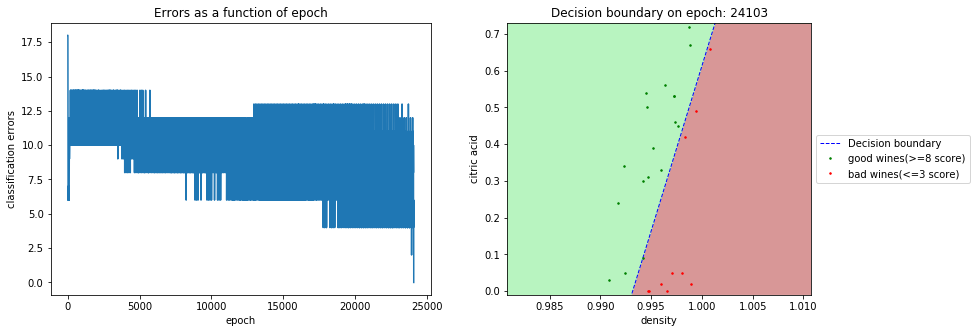

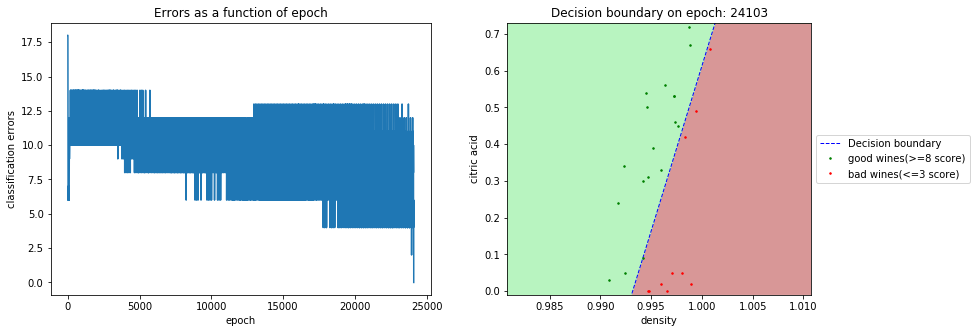

In [8]:
plot_performance(performance, selected_data, 8, 3)

## Feature scaling
 if we scale our data,the training process will be much faster

In [9]:
def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    elif mod == 'standart':
        return(column - column.mean()) / (column.std())
    else:
        raise ValueError('Doesnt correct mod type.')

In [10]:
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
print(norm_data)

     density  citric acid  quality
0   0.128357     0.204861        8
1   0.158357     0.190972        8
2  -0.361643    -0.364583        8
3   0.268357     0.565972        8
4   0.278357     0.496528        8
5   0.478357     0.482639        3
6   0.038357     0.343750        8
7   0.118357     0.302083        8
8   0.118357     0.302083        8
9   0.338357     0.246528        3
10 -0.431643    -0.100694        8
11  0.058357    -0.434028        3
12 -0.184643    -0.309028        8
13  0.230357     0.149306        3
14  0.290357    -0.406250        3
15 -0.139643     0.260417        8
16 -0.150643     0.315972        8
17 -0.366643     0.038194        8
18 -0.085643     0.107639        8
19 -0.521643    -0.392361        8
20 -0.125643    -0.434028        3
21 -0.130643    -0.434028        3
22 -0.001643     0.024306        8
23 -0.129643    -0.003472        8
24  0.103357    -0.364583        3
25  0.206357    -0.364583        3
26 -0.001643    -0.406250        3
27 -0.182643    -0.0

In [11]:
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X_norm, y, epoches=-1)
for el in performance:
    print('epoch num -  {} errors - {}'.format(el[0], el[1]))

epoch num -  1 errors - 10
epoch num -  2 errors - 10
epoch num -  3 errors - 10
epoch num -  4 errors - 10
epoch num -  5 errors - 10
epoch num -  6 errors - 9
epoch num -  7 errors - 10
epoch num -  8 errors - 10
epoch num -  9 errors - 11
epoch num -  10 errors - 11
epoch num -  11 errors - 11
epoch num -  12 errors - 11
epoch num -  13 errors - 10
epoch num -  14 errors - 10
epoch num -  15 errors - 10
epoch num -  16 errors - 10
epoch num -  17 errors - 12
epoch num -  18 errors - 14
epoch num -  19 errors - 13
epoch num -  20 errors - 13
epoch num -  21 errors - 13
epoch num -  22 errors - 13
epoch num -  23 errors - 13
epoch num -  24 errors - 13
epoch num -  25 errors - 12
epoch num -  26 errors - 13
epoch num -  27 errors - 12
epoch num -  28 errors - 13
epoch num -  29 errors - 12
epoch num -  30 errors - 13
epoch num -  31 errors - 12
epoch num -  32 errors - 13
epoch num -  33 errors - 12
epoch num -  34 errors - 12
epoch num -  35 errors - 9
epoch num -  36 errors - 9
epoc

In [12]:
%%timeit
perc.train(X_norm, y)

25 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
import matplotlib.animation as animation

# V.3 My fair ADALINE

Encouraged by the results of your perceptron, you decide to see if you can use it to
distinguish between wines with a score of 4 and lower, and wines with a score
of 7 and higher. Feeling confident, you decide to let the perceptron train until it can
find the best decision boundary.

In [14]:
class Adaline:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.W = []
        self.performance = []
        self.errors_batch = []
        self.bias = None

    def _sigmoid(self, arg):
        return 1 / (1 + np.exp(-arg))

    def _activ_func(self, arg):
        return 1 if self._sigmoid(arg) >= 0.5 else 0

    def _train_epoch_online(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(xi, self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._activ_func(res))
                Wnew = []
                for xi_j, w in zip(xi, self.W):
                    wnew = w + self.lr * (yi - self._activ_func(res)) * xi_j
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

    def _train_epoch_batch(self, X, y):
        errors_num = 1
        erros_batch = []
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(xi, self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                erros_batch.append([xi, yi])
        self.errors_batch.append(erros_batch)

        for xi, yi in erros_batch:
            res = ft_dot(xi, self.W) + self.bias
            self.bias = self.bias + self.lr * (yi - self._activ_func(res))
            Wnew = []
            for xi_j, w in zip(xi, self.W):
                wnew = w + self.lr * (yi - self._activ_func(res)) * xi_j
                Wnew.append(wnew)
            self.W = Wnew
        return errors_num

    def train(self, X, y, epoches=-1, mod='online'):
        self.W = [random.uniform(-1, 1) for i in range(X.shape[1])] 
        self.bias = random.uniform(-1, 1)
        epoch_num = 0
        if mod == 'online':
            while True:
                epoch_erro_num = self._train_epoch_online(X, y)
                epoch_num += 1
                self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
#                 pprint((epoch_num, epoch_erro_num, self.W, self.bias))
                if epoches == epoch_num and epoches > 0:
                    break
                if epoch_erro_num == 0:
                    break
            return self.performance
        elif mod == 'batch':
            while True:
                epoch_erro_num = self._train_epoch_batch(X, y)
                epoch_num += 1
                self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
#                 pprint((epoch_num, epoch_erro_num, self.W, self.bias))
                if epoches == epoch_num and epoches > 0:
                    break
                if epoch_erro_num == 0:
                    break
            return self.performance
        else:
            raise ValueError('Mod isnt correct')

    def predict(self, X):
        predicted_values = []
        for xi in X.values:
            res = ft_dot(xi, self.W) + self.bias
            predicted_values.append(self._activ_func(res))
        return predicted_values

In [15]:
selected_data = df[(df['quality'] >= 7) | (df['quality'] <= 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] <= 4] = 0
y.loc[y['quality'] >= 7] = 1
adaline = Adaline(lr=0.005)
performance = adaline.train(X_norm, y, mod='batch', epoches=500)
print(performance[-1])

(500, 190, [array([-0.00295268]), array([-0.00109713])], array([0.00455531]))


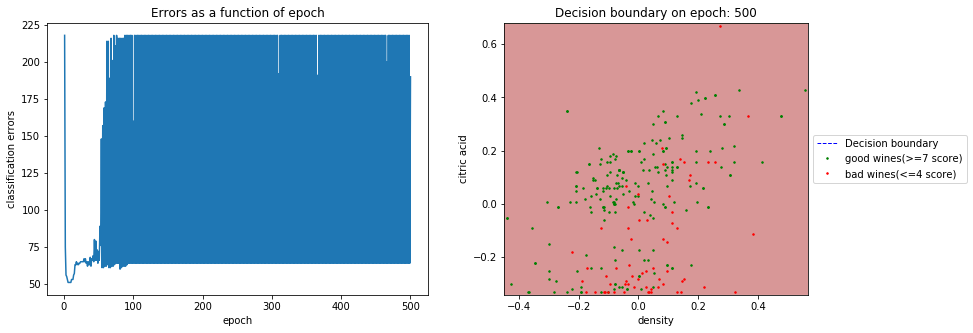

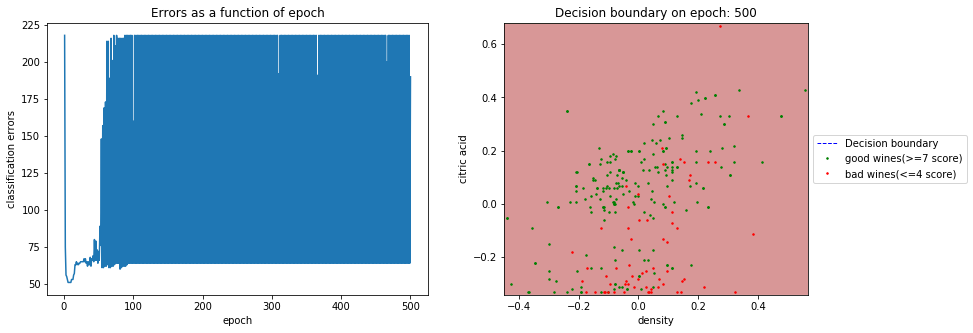

In [16]:
plot_performance(performance, norm_data, 7, 4)

## V.4 Advanced wine sampling and resampling

a) Holdout method to partition and checking accuracy with this method

In [17]:
def holdout_part(df, parts_num=5):
    if parts_num <= 0:
        raise ValueError('Doesnt correct parts num.')
    rows_num = len(df)
    slice_len = rows_num // parts_num
    train_df = df[:rows_num - slice_len]
    valid_df = df[rows_num - slice_len:]
    return train_df, valid_df

In [18]:
train_df, valid_df = holdout_part(selected_data)
X_train = train_df[['density', 'citric acid']]
y_train = train_df.loc[:, ['quality']]
y_train.loc[y['quality'] <= 4] = 0
y_train.loc[y['quality'] >= 7] = 1
epoches = 500
adaline = Adaline(lr=0.005)
performance = adaline.train(X, y, epoches=epoches)
X_valid = valid_df[['density', 'citric acid']]
y_valid = valid_df.loc[:, ['quality']]
y_valid.loc[y['quality'] <= 4] = 0
y_valid.loc[y['quality'] >= 7] = 1
pred_vals = adaline.predict(X_valid)
pred_errors = 0
for y_true, y_pred in zip(y_valid.values, pred_vals):
    if y_true == y_pred:
        pred_errors += 1
accuracy = 1 - (pred_errors / len(y_valid))
print('Accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy * 100))

Accuracy of prediction after 500 train epoches - 69.64285714285714%


b)  K-fold cross-validation method of partition and checking accuracy with this method

In [19]:
def k_fold_part(df, parts_num=5, valid_fold_num=1, shuffle=False):
    if parts_num <= 0 or valid_fold_num <= 0 or valid_fold_num > parts_num:
        raise ValueError('Doesnt correct parts num or valid fold num.')
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)
    res = df
    rows_num = len(res)
    slice_len = rows_num // parts_num
    start = slice_len * (valid_fold_num - 1)
    end = start + slice_len
    valid_df = res.loc[start:end-1, :]
    before_start = res.loc[:start-1, :]
    after_end = res.loc[end:, :]
    train_df = before_start.append(after_end)
    return train_df, valid_df

In [20]:
folds = 5
error_nums = []
for train_try in range(1, folds + 1):
    train_set, valid_set = k_fold_part(selected_data, valid_fold_num=train_try, parts_num=folds, shuffle=True)
    X_train = train_df[['density', 'citric acid']]
    y_train = train_df.loc[:, ['quality']]
    y_train.loc[y['quality'] <= 4] = 0
    y_train.loc[y['quality'] >= 7] = 1
    adaline = Adaline(lr=0.005)
    adaline.train(X_train, y_train, mod='online', epoches=epoches)
    X_valid = valid_df[['density', 'citric acid']]
    y_valid = valid_df.loc[:, ['quality']]
    y_valid.loc[y['quality'] <= 4] = 0
    y_valid.loc[y['quality'] >= 7] = 1
    predict_values = adaline.predict(X_valid)
    clas_errors = 0
    for y_pred, y_true in zip(predict_values, y_valid):
        if y_pred != y_true:
            clas_errors += 1
    clas_errors = 1 - (clas_errors / len(y_train))
    error_nums.append(clas_errors)
accuracy = sum(error_nums) / len(error_nums) * 100
print('Average accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy))

Average accuracy of prediction after 500 train epoches - 99.55357142857142%


## V.5 Adventures in the Nth dimension

a) Try training your perceptron/ADALINE with different numbers and types of chemical
factors. Under what circumstances can your perceptron/ADALINE successfully
train?

In [21]:
selected_data = df[(df['quality'] >= 7) | (df['quality'] <= 4)][['density', 'citric acid', 'pH', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
norm_data['pH'] = normalize_data(norm_data['pH'])
train_df, valid_df = k_fold_part(norm_data, shuffle=True)
X_train = train_df[['density', 'citric acid', 'pH']]
y_train = train_df.loc[:, ['quality']]
y_train.loc[y_train['quality'] <= 4] = 0
y_train.loc[y_train['quality'] >= 7] = 1
epoches = 1000
adaline = Adaline(lr=0.005)
performance = adaline.train(X_train, y_train, epoches=epoches)
X_valid = valid_df[['density', 'citric acid', 'pH']]
y_valid = valid_df.loc[:, ['quality']]
y_valid.loc[y_valid['quality'] <= 4] = 0
y_valid.loc[y_valid['quality'] >= 7] = 1
pred_vals = adaline.predict(X_valid)
pred_errors = 0
for y_true, y_pred in zip(y_valid.values, pred_vals):
    if y_true != y_pred:
        pred_errors += 1
accuracy = 1 - (pred_errors / len(y_valid))
print('Accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy * 100))

Accuracy of prediction after 1000 train epoches - 71.42857142857143%


In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(performance, data, good_trash, bad_trash):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    w0 = performance[-1][2][0][0]
    w1 = performance[-1][2][1][0]
    w2 = performance[-1][2][2][0]
    b = performance[-1][3][0]
    x = np.arange(-10, 10, 0.1)
    y = np.arange(-10, 10, 0.1)
    z = [-((w0 * xi + w1 * yi + b)/(w2)) for xi, yi in zip(x, y)]
    X, Y = np.meshgrid(x, y)
    Z = np.array([-((w0 * xi + w1 * yi + b)/(w2)) for xi, yi in zip(x, y)])
    ax.set_xlabel('density')
    ax.set_ylabel('citric acid')
    ax.set_zlabel('pH')
    ax.set_xlim(min(x) - 0.5, max(x) + 0.5)
    ax.set_ylim(min(y) - 0.5, max(y) + 0.5)
    ax.set_zlim(min(z) - 0.5, max(z) + 0.5)
    ax.plot3D(X, Y, Z, linewidth=0.2, antialiased=True)
    good = data.loc[data['quality'] >= 7]
    good = good[['density', 'citric acid', 'pH']]
    bad = data.loc[data['quality'] <= 4]
    bad = bad[['density', 'citric acid', 'pH']]
    ax.scatter(good['density'].values, good['citric acid'].values, good['pH'].values, c='green')
    ax.scatter(bad['density'].values, bad['citric acid'].values, bad['pH'].values, c='red')
    plt.show(fig)

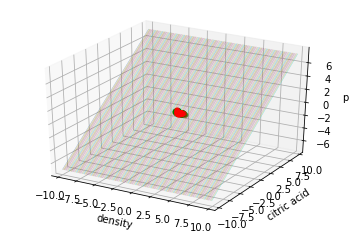

In [23]:
plot_3d(performance, norm_data, 7, 4)

b) You know what the decision boundary for 2 wine chemical factors looks like, but what
does the decision boundary for 3 factors look like? What about if you use 7 factors?
How about if you use all 11 wine chemical factors?

Desicion boundary for 3 factors look like a plane, for 4 factors it look like a space.
But if we take more then 4 factors desicion boundary will look like hyperplane.
Space with more then 3 axes.
## Imagine it (badUUUm in your brain) but you may try.

## V.6 Marvin’s rebuttal

a) While not a wine. . . find a way to successfully classify the Pan-Galactic Gargle Blaster
dataset. Show that your perceptron or ADALINE successfully classifies the PanGalactic
Gargle Blaster data set by plotting the decision boundary and also show
‘good’ and ‘bad’ Gargle Blaster data points.

In [24]:
pan_galactic_path = "./resources/Pan Galactic Gargle Blaster.csv"
df2 = pd.read_csv(pan_galactic_path, sep=';')

In [25]:
class AdalineEllipse(Adaline):
     def _train_epoch_online(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot([xi_j ** 2 for xi_j in xi], self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._activ_func(res))
                Wnew = []
                for xi_j, w in zip(xi, self.W):
                    wnew = w + self.lr * (yi - self._activ_func(res)) * (xi_j ** 2)
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

In [26]:
# print(list(df_pan_galactic))
selected_data = df2[(df2['quality'] > 8) | (df2['quality'] < 2)][['wonderflonium', 'fallian marsh gas', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['wonderflonium'] = normalize_data(norm_data['wonderflonium'])
norm_data['fallian marsh gas'] = normalize_data(norm_data['fallian marsh gas'])
X = norm_data[['wonderflonium', 'fallian marsh gas']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 2] = 0
y.loc[y['quality'] > 8] = 1
adaline = AdalineEllipse(lr=0.005)
performance = adaline.train(X, y, epoches=500)

In [27]:
def plot_performance_transform(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    if epoch > len(performance):
        raise Exception('too large epoch num passed')
    if epoch > 0:
        errors = [el[1] for el, feature in zip(performance, range(epoch))]
        epoches = [el[0] for el, feature in zip(performance, range(epoch))]
    else:
        errors = [el[1] for el in performance]
        epoches = [el[0] for el in performance]
    axes[0].plot(epoches, errors)
    if epoch > 0:
        W = performance[epoch][2]
        bias = performance[epoch][3]
    else:
        W = performance[-1][2]
        bias = performance[-1][3]
    w = -(W[0] / W[1])
    b = -bias/W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    axes[1].plot(x, y, 'b--', linewidth='1', label='Decision boundary')
    axes[1].set_xlabel('x1^2')
    axes[1].set_ylabel('x2^2')
    if epoch > 0:
        epoch_last = epoch
    else:
        epoch_last = performance[-1][0]
    axes[1].set_title('Decision boundary on epoch: ' + str(epoch_last))
    good_x, good_y, bad_x, bad_y = [], [], [], []
    for line in data.values:
        if line[-1] >= good_thresh or line[-1] <= bad_thresh:
            if line[-1] >= good_thresh:
                good_x.append(line[0])
                good_y.append(line[1])
            if line[-1] <= bad_thresh:
                bad_x.append(line[0])
                bad_y.append(line[1])
    sqr = lambda x: x ** 2
    good_x = list(map(sqr, good_x))
    good_y = list(map(sqr, good_y))
    bad_x = list(map(sqr, bad_x))
    bad_y = list(map(sqr, bad_y))
    dots1 = axes[1].plot(good_x, good_y, 'go', label='good wines(>=' + str(good_thresh) + ' score)')
    dots2 = axes[1].plot(bad_x, bad_y, 'ro', label='bad wines(<=' + str(bad_thresh) + ' score)')
    good_x.extend(bad_x)
    good_y.extend(bad_y)
    min_x_axes = min(good_x) - 0.01
    max_x_axes = max(good_x) + 0.01
    min_y_axes = min(good_y) - 0.01
    max_y_axes = max(good_y) + 0.01
    axes[1].set_xlim([min_x_axes, max_x_axes])
    axes[1].set_ylim([min_y_axes, max_y_axes])
    dots1[0].set_markersize(1.5)
    dots2[0].set_markersize(1.5)
    y_just_values = [yi[0] for yi in y]
    axes[1].fill_between(x, y_just_values, min_y_axes, color='#B8F4C0')
    axes[1].fill_between(x, y_just_values, max_y_axes, color='#D89797')
    box = axes[1].get_position()
    axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    if save_plot:
        fig.savefig("./decision_boundary.png")

f(x1,x2) -> f(x1^2, x2^2)

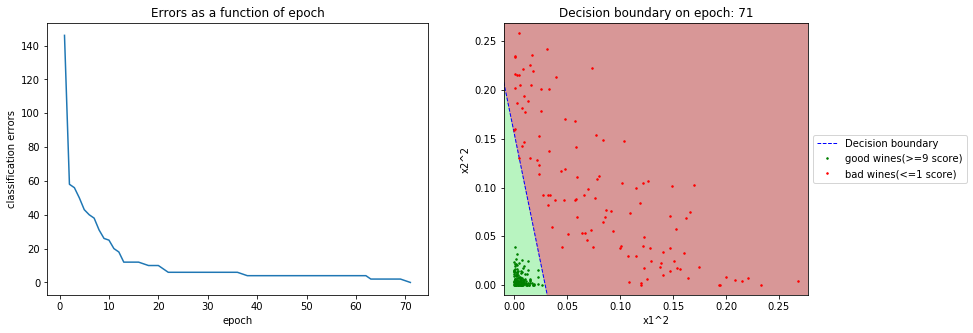

In [28]:
plot_performance_transform(performance, norm_data, 9, 1)

## VI.1 Gotta go fast!

Perceptron on cython

In [29]:
%load_ext Cython

In [30]:
%%cython
from libc.stdlib cimport malloc, free, rand, srand, RAND_MAX
from cpython cimport array
import array
import pandas as pd
data_path = "./resources/winequality-red.csv"

def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    else:
        raise ValueError('Doesnt correct mod type.')

cdef struct s_perceptron:
    float *weights;
    float bias;
    int n_weights;
ctypedef s_perceptron t_perceptron

cdef int heaviside(float arg):
    if arg >= 0:
        return 1
    else:
        return 0

cdef float ft_dot(xi, float *weights):
    cdef int x_len = len(xi)
    cdef float res = 0
    
    for i in range(x_len):
        res += xi[i] * weights[i]
    return res
    
cdef t_perceptron init_perc(X):
    cdef t_perceptron perc
    cdef int x_len = len(X[0])
    performance = []
    
    perc.n_weights = x_len
    perc.weights = <float*>malloc(sizeof(float) * x_len)
    for i in range(x_len):
        perc.weights[i] = rand()/RAND_MAX
    perc.bias = rand()/RAND_MAX
    return perc

cdef float cft_dot(t_perceptron perc, xi):
    cdef float res = 0
    cdef int i = 0
    for i in range(perc.n_weights):
        res += perc.weights[i] * xi[i]
    return(res)

cdef t_perceptron update_weights(t_perceptron perc, float lr, float res, xi, yi):
    for i in range(perc.n_weights):
        perc.weights[i] = perc.weights[i] + lr * (yi - heaviside(res)) * xi[i]
    return perc

cdef t_perceptron train_perc(t_perceptron perc, float lr, X, y):
    cdef int epoch_num = 0
    cdef int epoch_errors = 0
    cdef float res = 0
    
    while True:
        for xi, yi in zip(X, y):
            res = cft_dot(perc, xi) + perc.bias
            if heaviside(res) != yi:
                epoch_errors += 1
                perc.bias = perc.bias + lr * (yi - heaviside(res))
                perc = update_weights(perc, lr, res, xi, yi)
        if epoch_errors == 0:
            break
        epoch_errors = 0
        epoch_num += 1
    return perc

cdef perc_predict(t_perceptron perc, X):
    predicted_vals = []
    for xi in X:
        res = cft_dot(perc, xi) + perc.bias
        predicted_vals.append(heaviside(res))
    return predicted_vals

df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
X = list(X.values)
y = list(y.values)
cdef t_perceptron perc = init_perc(X)
perc = train_perc(perc, 0.005, X, y)
print('weights', perc.weights[0], perc.weights[1], 'bias',perc.bias)
predicted_vals = perc_predict(perc, X)
errors = 0
free(perc.weights)
for yi, yi_pred in zip(y, predicted_vals):
    if yi != yi_pred:
        errors += 1

def train_perceptron(X, y, lr):
    cdef t_perceptron perc = init_perc(X)
    perc = train_perc(perc, lr, X, y)
    free(perc.weights)



weights -0.29725316166877747 0.2396925389766693 bias 0.023502282798290253


In [31]:
%%timeit
train_perceptron(X, y, 0.005)

9 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
pperc = Perceptron(lr=0.005) 

In [33]:
%%timeit
pperc.train(X, y)

24.1 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Adaline on cython

In [34]:
%%cython
from libc.stdlib cimport malloc, free, rand, srand, RAND_MAX
from cpython cimport array
import array
from math import exp
import pandas as pd
data_path = "./resources/winequality-red.csv"

def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    else:
        raise ValueError('Doesnt correct mod type.')

cdef struct s_adaline:
    float *weights;
    float bias;
    int n_weights;
ctypedef s_adaline t_adaline

cdef int sigm(float arg):
    if 1 / (1 + exp(-arg)) >= 0.5:
        return 1
    else:
        return 0

cdef float ft_dot(xi, float *weights):
    cdef int x_len = len(xi)
    cdef float res = 0
    
    for i in range(x_len):
        res += xi[i] * weights[i]
    return res
    
cdef t_adaline init_adaline(X):
    cdef t_adaline adaline
    cdef int x_len = len(X[0])
    performance = []
    adaline.n_weights = x_len
    adaline.weights = <float*>malloc(sizeof(float) * x_len)
    for i in range(x_len):
        adaline.weights[i] = rand()/RAND_MAX
    adaline.bias = rand()/RAND_MAX
    return adaline

cdef float cft_dot(t_adaline adaline, xi):
    cdef float res = 0
    cdef int i = 0
    for i in range(adaline.n_weights):
        res += adaline.weights[i] * xi[i]
    return(res)

cdef t_adaline update_weights(t_adaline adaline, float lr, float res, xi, yi):
    for i in range(adaline.n_weights):
        adaline.weights[i] = adaline.weights[i] + lr * (yi - sigm(res)) * xi[i]
    return adaline

cdef t_adaline train_adaline(t_adaline adaline, float lr, X, y):
    cdef int epoch_num = 0
    cdef int epoch_errors = 0
    cdef float res = 0
    while True:
        for xi, yi in zip(X, y):
            res = cft_dot(adaline, xi) + adaline.bias
            if sigm(res) != yi:
                epoch_errors += 1
                adaline.bias = adaline.bias + lr * (yi - sigm(res))
                adaline = update_weights(adaline, lr, res, xi, yi)
        if epoch_errors == 0:
            break
        epoch_errors = 0
        epoch_num += 1
    return adaline

cdef adaline_predict(t_adaline adaline, X):
    predicted_vals = []
    for xi in X:
        res = cft_dot(adaline, xi) + adaline.bias
        predicted_vals.append(sigm(res))
    return predicted_vals

df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
X = list(X.values)
y = list(y.values)
cdef t_adaline adaline = init_adaline(X)
adaline = train_adaline(adaline, 0.005, X, y)
print('weights', adaline.weights[0], adaline.weights[1], 'bias', adaline.bias)
predicted_vals = adaline_predict(adaline, X)
errors = 0
free(adaline.weights)
for yi, yi_pred in zip(y, predicted_vals):
    if yi != yi_pred:
        errors += 1

def train_adaline_test(X, y, lr):
    cdef t_adaline adaline = init_adaline(X)
    adaline = train_adaline(adaline, lr, X, y)
    free(adaline.weights)

weights -0.4075126349925995 0.332999587059021 bias 0.02770359441637993


In [35]:
%%timeit
train_adaline_test(X, y, 0.005)

9.88 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## VI.2 Do perceptrons dream of electric sheep?

Create animated plots of errors as a function of epoch and the changing decision boundary
of your perceptron and/or ADALINE as a function of epoch. Each time step in your
animation should be equivalent to advancing the training epoch by 1!

In [59]:
%%capture
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
from matplotlib.lines import Line2D
# create figure by yourself

fig, axes = plt.subplots(1, 2, figsize=(15, 10));
fig.subplots_adjust(hspace=0, wspace=0)

line1 = axes[0].plot([],[], lw=2)[0];
line2 = axes[1].plot([],[], lw=2)[0];

def init():
    axes[0].set_xlim(0, max([el[0] for el in performance]) + 10)
    axes[0].set_ylim(0, max([el[1] for el in performance]) + 10)
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('errors')
    line1.set_data([], [])
    axes[1].set_xlabel('density')
    axes[1].set_ylabel('citr acid')
    axes[1].set_xlim(-1, 1)
    axes[1].set_ylim(-1, 1)
    
def animate(i):
    errors = [el[1] for el in performance[:i]]
    epoches = [el[0] for el in performance[:i]]
    line1.set_data(epoches[:i], errors[:i])
    W = performance[i][2]
    bias = performance[i][3]
    w = -(W[0] / W[1])
    b = -bias / W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    line2.set_data(x, y)
    return line1, line2

ani = animation.FuncAnimation(fig, animate, interval=80, init_func=init, frames=len(performance))

In [62]:
HTML(ani.to_jshtml(fps=24))